# Classifying each state into categories based on GDP, health, education, employment, and crime

In [146]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [147]:
# Importing the dataset
gdp= pd.read_csv('State_GDP_2014_2018.csv', delimiter=',')
unemp= pd.read_csv('State_Unemployment_2014_2018.csv', delimiter=';', decimal=",")
health= pd.read_csv('State_Health_2014_2018.csv', delimiter=';', decimal=",")
edu= pd.read_csv('State_Educational_Attainment_2014_2018.csv', delimiter=';')
crime= pd.read_csv('State_CrimeRates_per100k_2014_2018.csv', delimiter=';')

statecodes= pd.read_csv('StateCodes.csv')

In [148]:
statecodes.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [149]:
dfs=[gdp, unemp, health, edu, crime]
for d in dfs:
    d.sort_values(by='State', inplace=True)
    d.reset_index(inplace=True, drop=True)
    d['State']=statecodes['Code'].copy()

## Cleaning the Datasets

### GDP

In [150]:
gdp.head()
years=['2014','2015','2016','2017','2018']
for y in years:
    gdp[y]=gdp.loc[:,gdp.columns.str.contains(y)].sum(axis=1)
gdp=gdp[['State']+years]
gdp.head()


,State,2014,2015,2016,2017,2018
0,AL,759545.3,765340.9,777135.2,790266.5,803203.6
1,AK,216752.9,218963.4,216986.5,216518.1,212998.4
2,AZ,1107795.8,1130307.9,1165100.9,1209821.5,1254474.9
3,AR,446938.0,449403.9,451192.5,455540.6,463750.4
4,CA,9024218.9,9429811.7,9711578.3,10167077.1,10574305.0


In [151]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   51 non-null     object 
 1   2014    51 non-null     float64
 2   2015    51 non-null     float64
 3   2016    51 non-null     float64
 4   2017    51 non-null     float64
 5   2018    51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


### Unemployment

In [152]:
unemp.head()

,State,2014,2015,2016,2017,2018
0,AL,6.8,6.1,5.8,4.4,3.9
1,AK,6.9,6.5,6.9,7.0,6.6
2,AZ,6.8,6.1,5.4,4.9,4.8
3,AR,6.0,5.0,4.0,3.7,3.7
4,CA,7.5,6.2,5.5,4.8,4.2


In [153]:
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   51 non-null     object 
 1   2014    51 non-null     float64
 2   2015    51 non-null     float64
 3   2016    51 non-null     float64
 4   2017    51 non-null     float64
 5   2018    51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


### Health

In [154]:
health=health.drop(['dropit'], axis=1)
health.head()
print(health)

   State  2018  2017  2016  2015  2014
0     AL  89.8  90.5  90.8  89.8  88.0
1     AK  88.0  86.1  85.5  85.5  82.5
2     AZ  89.4  90.0  90.0  88.9  86.3
3     AR  91.7  92.0  92.0  90.6  88.2
4     CA  92.8  92.8  92.6  91.5  87.5
5     CO  92.3  92.5  92.3  91.9  89.4
6     CT  94.7  94.4  95.1  93.9  93.0
7     DE  94.2  94.4  94.2  94.4  92.6
8     DC  96.8  96.4  96.0  96.3  94.5
9     FL  86.8  87.1  87.5  86.6  83.4
10    GA  86.2  86.6  87.1  86.1  84.2
11    HI  96.1  96.2  96.5  96.2  95.1
12    ID  88.9  89.3  89.7  88.7  86.6
13    IL  92.9  93.1  93.5  92.9  90.1
14    IN  91.5  91.6  91.9  90.1  88.0
15    IA  95.1  95.6  96.0  95.1  94.3
16    KS  91.3  91.5  91.6  90.7  89.4
17    KY  94.4  94.5  94.8  93.9  91.2
18    LA  92.1  91.7  89.8  87.9  85.5
19    ME  92.2  92.2  92.1  91.4  90.2
20    MD  94.0  93.9  93.9  93.3  92.1
21    MA  97.3  97.2  97.5  97.2  96.6
22    MI  94.6  94.9  94.7  94.0  91.6
23    MN  95.7  95.5  95.8  95.5  94.0
24    MS  87.7  87.9  88.

In [155]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   51 non-null     object 
 1   2018    51 non-null     float64
 2   2017    51 non-null     float64
 3   2016    51 non-null     float64
 4   2015    51 non-null     float64
 5   2014    51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


### Education

In [156]:
edu.head()

,State,2018,2017,2016,2015,2014
0,AL,30.2,28.8,29.6,29.7,28.0
1,AK,29.7,29.4,28.9,27.7,27.6
2,AZ,23.3,23.4,22.4,21.8,21.4
3,AR,34.2,33.6,32.9,32.3,31.7
4,CA,41.7,41.2,39.9,39.2,38.3


In [157]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   51 non-null     object 
 1   2018    51 non-null     float64
 2   2017    51 non-null     float64
 3   2016    51 non-null     float64
 4   2015    51 non-null     float64
 5   2014    51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


### Crime

In [158]:
crime.head()

,State,2018,2017,2016,2015,2014
0,AL,523.1,522.4,532.4,472.4,427.7
1,AK,891.7,856.7,804.6,730.2,635.5
2,AZ,475.7,505.7,471.0,410.2,392.7
3,AR,561.6,566.0,554.3,521.3,480.2
4,CA,447.5,453.3,444.8,426.3,396.4


In [159]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   51 non-null     object 
 1   2018    51 non-null     float64
 2   2017    51 non-null     float64
 3   2016    51 non-null     float64
 4   2015    51 non-null     float64
 5   2014    51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


## Merging the datasets

In [160]:
# Merging the datasets
gdp_unemp=pd.merge(gdp, unemp, on='State', suffixes=('_gdp','_unemp'))
gdp_unemp_health=pd.merge(gdp_unemp, health, on='State', suffixes=('','_health'))
gdp_unemp_health_edu=pd.merge(gdp_unemp_health, edu, on='State', suffixes=('_health',''))
gdp_unemp_health_edu_crime=pd.merge(gdp_unemp_health_edu, crime, on='State', suffixes=('_edu', '_crime'))

In [161]:
gdp_unemp_health_edu_crime.head()

,State,2014_gdp,2015_gdp,2016_gdp,2017_gdp,2018_gdp,2014_unemp,2015_unemp,2016_unemp,2017_unemp,...,2018_edu,2017_edu,2016_edu,2015_edu,2014_edu,2018_crime,2017_crime,2016_crime,2015_crime,2014_crime
0,AL,759545.3,765340.9,777135.2,790266.5,803203.6,6.8,6.1,5.8,4.4,...,30.2,28.8,29.6,29.7,28.0,523.1,522.4,532.4,472.4,427.7
1,AK,216752.9,218963.4,216986.5,216518.1,212998.4,6.9,6.5,6.9,7.0,...,29.7,29.4,28.9,27.7,27.6,891.7,856.7,804.6,730.2,635.5
2,AZ,1107795.8,1130307.9,1165100.9,1209821.5,1254474.9,6.8,6.1,5.4,4.9,...,23.3,23.4,22.4,21.8,21.4,475.7,505.7,471.0,410.2,392.7
3,AR,446938.0,449403.9,451192.5,455540.6,463750.4,6.0,5.0,4.0,3.7,...,34.2,33.6,32.9,32.3,31.7,561.6,566.0,554.3,521.3,480.2
4,CA,9024218.9,9429811.7,9711578.3,10167077.1,10574305.0,7.5,6.2,5.5,4.8,...,41.7,41.2,39.9,39.2,38.3,447.5,453.3,444.8,426.3,396.4


In [162]:
devscaled=gdp_unemp_health_edu_crime.copy()

In [163]:
devscaled.head()

,State,2014_gdp,2015_gdp,2016_gdp,2017_gdp,2018_gdp,2014_unemp,2015_unemp,2016_unemp,2017_unemp,...,2018_edu,2017_edu,2016_edu,2015_edu,2014_edu,2018_crime,2017_crime,2016_crime,2015_crime,2014_crime
0,AL,759545.3,765340.9,777135.2,790266.5,803203.6,6.8,6.1,5.8,4.4,...,30.2,28.8,29.6,29.7,28.0,523.1,522.4,532.4,472.4,427.7
1,AK,216752.9,218963.4,216986.5,216518.1,212998.4,6.9,6.5,6.9,7.0,...,29.7,29.4,28.9,27.7,27.6,891.7,856.7,804.6,730.2,635.5
2,AZ,1107795.8,1130307.9,1165100.9,1209821.5,1254474.9,6.8,6.1,5.4,4.9,...,23.3,23.4,22.4,21.8,21.4,475.7,505.7,471.0,410.2,392.7
3,AR,446938.0,449403.9,451192.5,455540.6,463750.4,6.0,5.0,4.0,3.7,...,34.2,33.6,32.9,32.3,31.7,561.6,566.0,554.3,521.3,480.2
4,CA,9024218.9,9429811.7,9711578.3,10167077.1,10574305.0,7.5,6.2,5.5,4.8,...,41.7,41.2,39.9,39.2,38.3,447.5,453.3,444.8,426.3,396.4


In [164]:
#scale the data to be between 0 and 1 using min-max scaling
for col in devscaled.columns:
    if col!='State':
        devscaled[col]=(devscaled[col]-devscaled[col].min())/(devscaled[col].max()-devscaled[col].min())


In [165]:
devscaled.head()

,State,2014_gdp,2015_gdp,2016_gdp,2017_gdp,2018_gdp,2014_unemp,2015_unemp,2016_unemp,2017_unemp,...,2018_edu,2017_edu,2016_edu,2015_edu,2014_edu,2018_crime,2017_crime,2016_crime,2015_crime,2014_crime
0,AL,0.072278,0.069670,0.068742,0.066898,0.065489,0.788462,0.804878,0.725,0.434783,...,0.227621,0.231806,0.244444,0.272237,0.245810,0.464467,0.455504,0.378323,0.307879,0.285175
1,AK,0.011349,0.011004,0.010356,0.009803,0.009041,0.807692,0.902439,1.000,1.000000,...,0.214834,0.247978,0.225000,0.218329,0.234637,0.880917,0.834486,0.630477,0.531839,0.467456
2,AZ,0.111370,0.108858,0.109180,0.108649,0.108648,0.788462,0.804878,0.625,0.543478,...,0.051151,0.086253,0.044444,0.059299,0.061453,0.410914,0.436572,0.321445,0.253844,0.254474
3,AR,0.037188,0.035747,0.034768,0.033589,0.033023,0.634615,0.536585,0.275,0.282609,...,0.329923,0.361186,0.336111,0.342318,0.349162,0.507965,0.504931,0.398610,0.350361,0.331228
4,CA,1.000000,1.000000,1.000000,1.000000,1.000000,0.923077,0.829268,0.650,0.521739,...,0.521739,0.566038,0.530556,0.528302,0.533520,0.379053,0.377168,0.297175,0.267831,0.257719


In [166]:
#multiply crime and unemployment by -1 as they are negative factors
devscaled.loc[:,devscaled.columns.str.contains('_crime')]=-1*devscaled.loc[:,devscaled.columns.str.contains('_crime')]
devscaled.loc[:,devscaled.columns.str.contains('_unemp')]=-1*devscaled.loc[:,devscaled.columns.str.contains('_unemp')]
devscaled.head()

,State,2014_gdp,2015_gdp,2016_gdp,2017_gdp,2018_gdp,2014_unemp,2015_unemp,2016_unemp,2017_unemp,...,2018_edu,2017_edu,2016_edu,2015_edu,2014_edu,2018_crime,2017_crime,2016_crime,2015_crime,2014_crime
0,AL,0.072278,0.069670,0.068742,0.066898,0.065489,-0.788462,-0.804878,-0.725,-0.434783,...,0.227621,0.231806,0.244444,0.272237,0.245810,-0.464467,-0.455504,-0.378323,-0.307879,-0.285175
1,AK,0.011349,0.011004,0.010356,0.009803,0.009041,-0.807692,-0.902439,-1.000,-1.000000,...,0.214834,0.247978,0.225000,0.218329,0.234637,-0.880917,-0.834486,-0.630477,-0.531839,-0.467456
2,AZ,0.111370,0.108858,0.109180,0.108649,0.108648,-0.788462,-0.804878,-0.625,-0.543478,...,0.051151,0.086253,0.044444,0.059299,0.061453,-0.410914,-0.436572,-0.321445,-0.253844,-0.254474
3,AR,0.037188,0.035747,0.034768,0.033589,0.033023,-0.634615,-0.536585,-0.275,-0.282609,...,0.329923,0.361186,0.336111,0.342318,0.349162,-0.507965,-0.504931,-0.398610,-0.350361,-0.331228
4,CA,1.000000,1.000000,1.000000,1.000000,1.000000,-0.923077,-0.829268,-0.650,-0.521739,...,0.521739,0.566038,0.530556,0.528302,0.533520,-0.379053,-0.377168,-0.297175,-0.267831,-0.257719


In [167]:
##Compute year totals for each state for each year
years=['2014','2015','2016','2017','2018']
for y in years:
    devscaled[y+'_total']=devscaled.loc[:,devscaled.columns.str.contains(y)].sum(axis=1)
devscaled.head()

,State,2014_gdp,2015_gdp,2016_gdp,2017_gdp,2018_gdp,2014_unemp,2015_unemp,2016_unemp,2017_unemp,...,2018_crime,2017_crime,2016_crime,2015_crime,2014_crime,2014_total,2015_total,2016_total,2017_total,2018_total
0,AL,0.072278,0.069670,0.068742,0.066898,0.065489,-0.788462,-0.804878,-0.725,-0.434783,...,-0.464467,-0.455504,-0.378323,-0.307879,-0.285175,-0.303319,-0.291977,-0.265315,-0.050487,-0.028500
1,AK,0.011349,0.011004,0.010356,0.009803,0.009041,-0.807692,-0.902439,-1.000,-1.000000,...,-0.880917,-0.834486,-0.630477,-0.531839,-0.467456,-0.927252,-1.028889,-1.246185,-1.336978,-1.277042
2,AZ,0.111370,0.108858,0.109180,0.108649,0.108648,-0.788462,-0.804878,-0.625,-0.543478,...,-0.410914,-0.436572,-0.321445,-0.253844,-0.254474,-0.526164,-0.475072,-0.324735,-0.278299,-0.349210
3,AR,0.037188,0.035747,0.034768,0.033589,0.033023,-0.634615,-0.536585,-0.275,-0.282609,...,-0.507965,-0.504931,-0.398610,-0.350361,-0.331228,-0.114526,0.026331,0.307197,0.251070,0.172124
4,CA,1.000000,1.000000,1.000000,1.000000,1.000000,-0.923077,-0.829268,-0.650,-0.521739,...,-0.379053,-0.377168,-0.297175,-0.267831,-0.257719,0.773105,1.029794,1.235863,1.365761,1.414114


In [168]:
#rank states by total for each year
devscaled['2014_rank']=devscaled['2014_total'].rank(ascending=False)
devscaled['2015_rank']=devscaled['2015_total'].rank(ascending=False)
devscaled['2016_rank']=devscaled['2016_total'].rank(ascending=False)
devscaled['2017_rank']=devscaled['2017_total'].rank(ascending=False)
devscaled['2018_rank']=devscaled['2018_total'].rank(ascending=False)
devscaled.head()

,State,2014_gdp,2015_gdp,2016_gdp,2017_gdp,2018_gdp,2014_unemp,2015_unemp,2016_unemp,2017_unemp,...,2014_total,2015_total,2016_total,2017_total,2018_total,2014_rank,2015_rank,2016_rank,2017_rank,2018_rank
0,AL,0.072278,0.069670,0.068742,0.066898,0.065489,-0.788462,-0.804878,-0.725,-0.434783,...,-0.303319,-0.291977,-0.265315,-0.050487,-0.028500,41.0,43.0,44.0,42.0,44.0
1,AK,0.011349,0.011004,0.010356,0.009803,0.009041,-0.807692,-0.902439,-1.000,-1.000000,...,-0.927252,-1.028889,-1.246185,-1.336978,-1.277042,51.0,51.0,51.0,51.0,51.0
2,AZ,0.111370,0.108858,0.109180,0.108649,0.108648,-0.788462,-0.804878,-0.625,-0.543478,...,-0.526164,-0.475072,-0.324735,-0.278299,-0.349210,48.0,46.0,46.0,48.0,48.0
3,AR,0.037188,0.035747,0.034768,0.033589,0.033023,-0.634615,-0.536585,-0.275,-0.282609,...,-0.114526,0.026331,0.307197,0.251070,0.172124,39.0,36.0,28.0,31.0,36.0
4,CA,1.000000,1.000000,1.000000,1.000000,1.000000,-0.923077,-0.829268,-0.650,-0.521739,...,0.773105,1.029794,1.235863,1.365761,1.414114,5.0,2.0,2.0,1.0,1.0


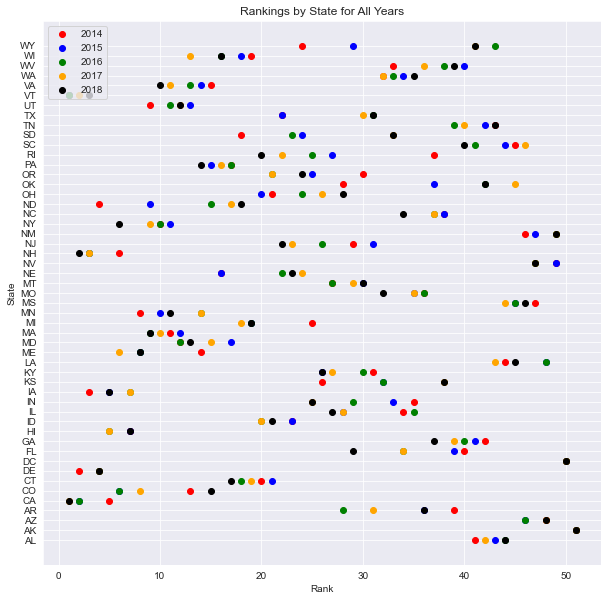

In [169]:
#plot the rankings from all years
plt.figure(figsize=(10,10))
plt.plot(devscaled['2014_rank'], devscaled['State'], 'o', color='red', label='2014')
plt.plot(devscaled['2015_rank'], devscaled['State'], 'o', color='blue', label='2015')
plt.plot(devscaled['2016_rank'], devscaled['State'], 'o', color='green', label='2016')
plt.plot(devscaled['2017_rank'], devscaled['State'], 'o', color='orange', label='2017')
plt.plot(devscaled['2018_rank'], devscaled['State'], 'o', color='black', label='2018')
plt.legend(loc='upper left')
plt.xlabel('Rank')
plt.ylabel('State')
plt.title('Rankings by State for All Years')
plt.show()

In [170]:
#divide into 5 groups based on the rankings
devscaled['2014_group']=devscaled['2014_rank'].apply(lambda x: int(x/10))
devscaled['2015_group']=devscaled['2015_rank'].apply(lambda x: int(x/10))
devscaled['2016_group']=devscaled['2016_rank'].apply(lambda x: int(x/10))
devscaled['2017_group']=devscaled['2017_rank'].apply(lambda x: int(x/10))
devscaled['2018_group']=devscaled['2018_rank'].apply(lambda x: int(x/10))
devscaled.head()

,State,2014_gdp,2015_gdp,2016_gdp,2017_gdp,2018_gdp,2014_unemp,2015_unemp,2016_unemp,2017_unemp,...,2014_rank,2015_rank,2016_rank,2017_rank,2018_rank,2014_group,2015_group,2016_group,2017_group,2018_group
0,AL,0.072278,0.069670,0.068742,0.066898,0.065489,-0.788462,-0.804878,-0.725,-0.434783,...,41.0,43.0,44.0,42.0,44.0,4,4,4,4,4
1,AK,0.011349,0.011004,0.010356,0.009803,0.009041,-0.807692,-0.902439,-1.000,-1.000000,...,51.0,51.0,51.0,51.0,51.0,5,5,5,5,5
2,AZ,0.111370,0.108858,0.109180,0.108649,0.108648,-0.788462,-0.804878,-0.625,-0.543478,...,48.0,46.0,46.0,48.0,48.0,4,4,4,4,4
3,AR,0.037188,0.035747,0.034768,0.033589,0.033023,-0.634615,-0.536585,-0.275,-0.282609,...,39.0,36.0,28.0,31.0,36.0,3,3,2,3,3
4,CA,1.000000,1.000000,1.000000,1.000000,1.000000,-0.923077,-0.829268,-0.650,-0.521739,...,5.0,2.0,2.0,1.0,1.0,0,0,0,0,0


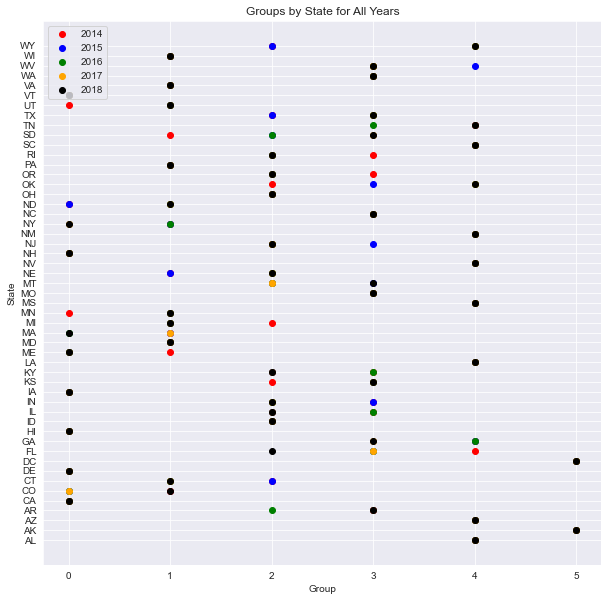

In [171]:
#plot the groups from all years
plt.figure(figsize=(10,10))
plt.plot(devscaled['2014_group'], devscaled['State'], 'o', color='red', label='2014')
plt.plot(devscaled['2015_group'], devscaled['State'], 'o', color='blue', label='2015')
plt.plot(devscaled['2016_group'], devscaled['State'], 'o', color='green', label='2016')
plt.plot(devscaled['2017_group'], devscaled['State'], 'o', color='orange', label='2017')
plt.plot(devscaled['2018_group'], devscaled['State'], 'o', color='black', label='2018')
plt.legend(loc='upper left')
plt.xlabel('Group')
plt.ylabel('State')
plt.title('Groups by State for All Years')
plt.show()

In [172]:
#save rankings to a file
devscaled.to_csv('devscaled.csv', index=False)